In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting up random seed for project requirements 
np.random.seed(73)

In [2]:
df_sen_house = pd.read_csv('../data/senate_and_house.csv')
df_sen_house.head()

,Unnamed: 0,transaction_date,ticker,asset_description,type,amount,representative
0,4,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee
1,5,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee
2,6,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee
3,10,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee
4,12,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee


In [3]:
df_sen_house.drop(columns=['Unnamed: 0'], inplace=True)
df_sen_house.head()

,transaction_date,ticker,asset_description,type,amount,representative
0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee
1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee
2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee
3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee
4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee


In [8]:
# This gets the number of transactions per date from earliest to latest
df_sen_house['transaction_date'].value_counts().sort_index()

2013-03-15    1
2013-04-29    1
2013-06-13    1
2014-01-24    3
2014-01-28    1
             ..
2021-05-11    3
2021-05-12    9
2021-05-13    4
2021-05-14    1
2021-05-25    3
Name: transaction_date, Length: 1451, dtype: int64

In [12]:
# get this into a useful dataframe
transactions_df = pd.DataFrame(df_sen_house['transaction_date'].value_counts().
                              sort_index().reset_index())
transactions_df.head()

,index,transaction_date
0,2013-03-15,1
1,2013-04-29,1
2,2013-06-13,1
3,2014-01-24,3
4,2014-01-28,1


In [13]:
transactions_df.columns = ['Date', 'Transactions']
transactions_df.head()

,Date,Transactions
0,2013-03-15,1
1,2013-04-29,1
2,2013-06-13,1
3,2014-01-24,3
4,2014-01-28,1


<AxesSubplot:xlabel='Date(latest on right)', ylabel='Transactions'>

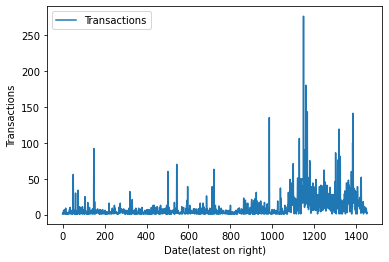

In [15]:
transactions_df.plot(xlabel='Date(latest on right)', ylabel='Transactions')

**NOTE**: The senators and reps files had different date ranges!
**CONCLUSION**: There are certain dates with an unusually high number of transactions

In [28]:
# create an amounts dataframe
amounts_df = pd.DataFrame(df_sen_house['amount'].value_counts().
                              sort_index().reset_index())
amounts_df.columns = ['Amount', 'Transactions']
amounts_df

,Amount,Transactions
0,"$1,000,001 - $5,000,000",28
1,"$1,001 -",211
2,"$1,001 - $15,000",9579
3,"$100,001 - $250,000",430
4,"$15,001 - $50,000",2137
5,"$25,000,001 - $50,000,000",1
6,"$250,001 - $500,000",93
7,"$5,000,001 - $25,000,000",7
8,"$50,000,000 +",1
9,"$50,001 - $100,000",697


In [29]:
# Create a new column for an index to sort these from smallest to largest
amounts_df['real_index'] = [7,0,1,4,2,9,5,8,10,3,6]
amounts_df

,Amount,Transactions,real_index
0,"$1,000,001 - $5,000,000",28,7
1,"$1,001 -",211,0
2,"$1,001 - $15,000",9579,1
3,"$100,001 - $250,000",430,4
4,"$15,001 - $50,000",2137,2
5,"$25,000,001 - $50,000,000",1,9
6,"$250,001 - $500,000",93,5
7,"$5,000,001 - $25,000,000",7,8
8,"$50,000,000 +",1,10
9,"$50,001 - $100,000",697,3


In [30]:
amounts_df.set_index('real_index', inplace=True)

In [31]:
# finalize dataframe
amounts_df = amounts_df.sort_index()
amounts_df

,Amount,Transactions
real_index,,
0,"$1,001 -",211
1,"$1,001 - $15,000",9579
2,"$15,001 - $50,000",2137
3,"$50,001 - $100,000",697
4,"$100,001 - $250,000",430
5,"$250,001 - $500,000",93
6,"$500,001 - $1,000,000",38
7,"$1,000,001 - $5,000,000",28
8,"$5,000,001 - $25,000,000",7


In [38]:
amounts_df.set_index('Amount', inplace=True)

<AxesSubplot:xlabel='Amount'>

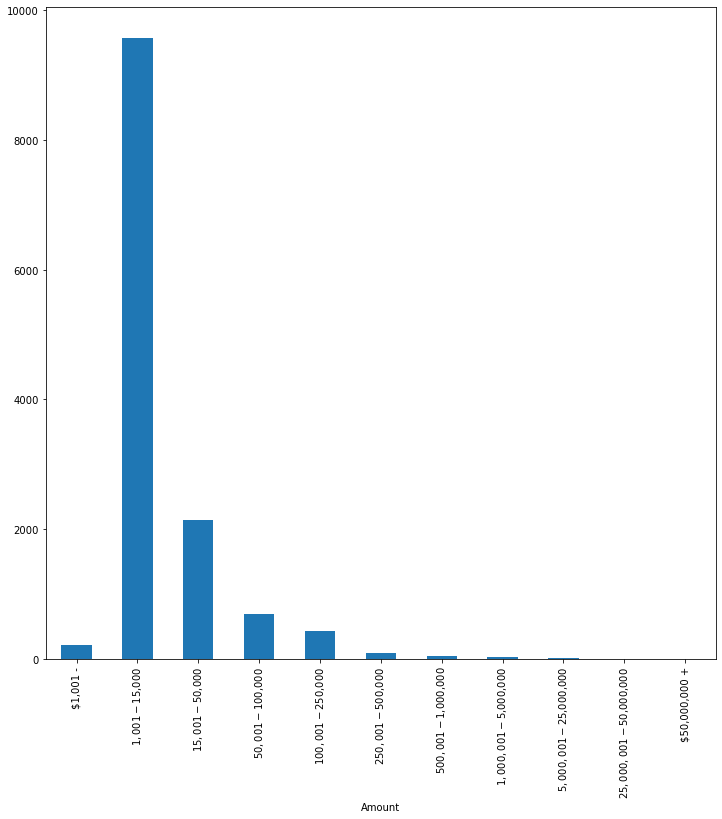

In [42]:
amounts_df.plot(kind='bar', legend=False, figsize=(12,12))

In [49]:
types_df = df_sen_house['type'].value_counts()

In [50]:
types_df = pd.DataFrame(types_df)
types_df

,type
purchase,6592
sale_full,3863
sale_partial,2643
exchange,124


In [51]:
types_df.columns = ['Transactions']

In [52]:
types_df

,Transactions
purchase,6592
sale_full,3863
sale_partial,2643
exchange,124
